# Classifiaction of MNIST numbers with TensorFlow

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

**matplotlib** must be imported before **tensorflow** (to avoid a `OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.` error)

In [3]:
import tensorflow as tf

Load and prepare the **MNIST** dataset. 

Convert the samples from integers to floating-point numbers

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

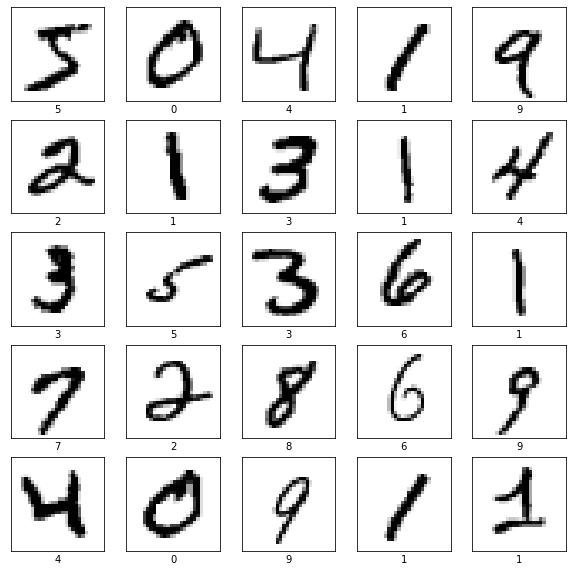

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

Build the `tf.keras.Sequential` model by stacking layers. 

Choose an optimizer and loss function for training:

In [6]:
tf.keras.backend.set_floatx('float64')
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

For each example the model returns a vector of "logits" or "log-odds" scores, one for each class. The `tf.nn.softmax` function converts these logits to "probabilities" for each class:

In [7]:
predictions = model(x_train[:1]).numpy()
tf.nn.softmax(predictions).numpy()

array([[0.07465648, 0.08764935, 0.10290505, 0.06144321, 0.07877436,
        0.17683414, 0.05746031, 0.12534523, 0.11745513, 0.11747674]])

The `losses.SparseCategoricalCrossentropy` loss takes a vector of logits and a True index and returns a scalar loss for each example.

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

1.7325429916381836

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train Model

In [33]:
num_epochs = 20
training_data = model.fit(x_train, y_train, epochs=num_epochs)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0234 - accuracy: 0.9921
Epoch 2/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0239 - accuracy: 0.9917
Epoch 3/20
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0228 - accuracy: 0.9920
Epoch 4/20
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0235 - accuracy: 0.9921
Epoch 5/20
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0208 - accuracy: 0.9924
Epoch 6/20
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0215 - accuracy: 0.9929
Epoch 7/20
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0207 - accuracy: 0.9926
Epoch 8/20
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0197 - accuracy: 0.9929
Epoch 9/20
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0169 - accuracy: 0.9941
Epoch

## Visualizing losses and accuracy

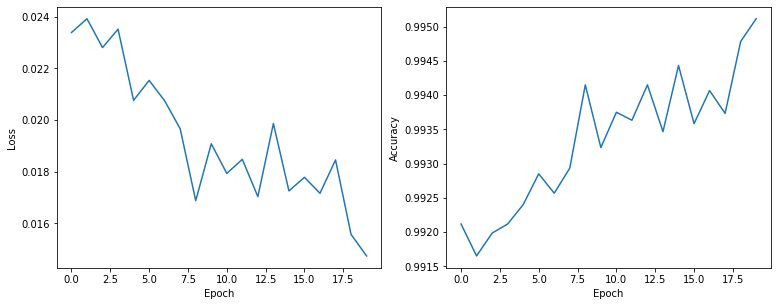

In [34]:
train_loss = training_data.history['loss']
train_accuracy = training_data.history['accuracy']
xc = range(num_epochs)

plt.figure(figsize=(12.8, 4.8))

plt.subplot(1,2,1)
plt.plot(xc, train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')   

plt.subplot(1,2,2)
plt.plot(xc, train_accuracy)
plt.xlabel('Epoch')
plt.ylabel('Accuracy');   

## Evaluate Model using Test Data

In [35]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 0.0493 - accuracy: 0.9825


[0.09853539565791981, 0.9825]

## Use Trained Model

In [36]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [37]:
(x_verify, y_verify) = (x_test[1], probability_model(x_test[1:2]));

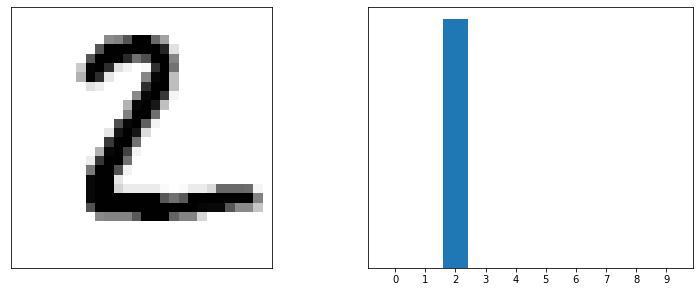

In [38]:
plt.figure(figsize=(12.8, 4.8))
plt.subplot(1,2,1)
plt.imshow(x_verify, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.bar(range(10), y_verify[0])
plt.xticks(range(10))
plt.yticks([]);